In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from sklearn import metrics, linear_model, preprocessing

# initialize variabls
alpha = 0.01
theta_matrix = [-1, -0.5] # theta_0 = -1, theta_1 = -0.5
max_iteration = 500
cost_history = [0] * max_iteration


# define cost function
def cost_function(input_X, target_y, theta):
    # Retrieving number of samples in input data
    m = len(input_X)
    
    # Calculating total cost
    cost = np.sum((target_y - input_X.dot(theta))**2) / m
    
    return cost


# define gradiend descent
def gradient_descent(train_X, train_y, theta):
    m = len(train_X)
    for i in range(max_iteration):
        predict = train_X.dot(theta)
        
        # update theta by translating pseudo-code
        theta = theta + (alpha / m) * (train_X.T.dot(train_y - train_X.dot(theta)))
        
        # calculate cost and record it into history
        cost = cost_function(train_X, train_y, theta)
        cost_history[i] = cost
    return theta


# define RMSE function
def RMSE_function(y_correct, y_predict):
    diff = y_correct - y_predict
    m = len(y_predict)
    result = np.sqrt(np.sum(diff.T * diff) / m)
    return result


# Below is main
dataset = pd.read_csv('Advertising.csv')

# TV, Ratio, Newspaper
tags = dataset.columns

# Normalization
scaler = preprocessing.MinMaxScaler()
scaler.fit(dataset)
dataset = scaler.transform(dataset)
print (dataset)

# Last column of dataset: target Y output
Y = dataset[:, 4]

[[0.         0.77578627 0.76209677 0.60598065 0.80708661]
 [0.00502513 0.1481231  0.79233871 0.39401935 0.34645669]
 [0.01005025 0.0557998  0.92540323 0.60686016 0.30314961]
 [0.01507538 0.50997633 0.83266129 0.51187335 0.66535433]
 [0.0201005  0.60906324 0.21774194 0.51099384 0.44488189]
 [0.02512563 0.02705445 0.9858871  0.65699208 0.22047244]
 [0.03015075 0.19208657 0.66129032 0.20404573 0.4015748 ]
 [0.03517588 0.4041258  0.39516129 0.09938434 0.45669291]
 [0.04020101 0.02671627 0.04233871 0.00615655 0.12598425]
 [0.04522613 0.67331755 0.05241935 0.18381706 0.35433071]
 [0.05025126 0.2211701  0.11693548 0.21020229 0.27559055]
 [0.05527638 0.72370646 0.48387097 0.03254178 0.62204724]
 [0.06030151 0.07811972 0.70766129 0.5769569  0.2992126 ]
 [0.06532663 0.32735881 0.15322581 0.06068602 0.31889764]
 [0.07035176 0.68785932 0.66330645 0.40193492 0.68503937]
 [0.07537688 0.65843761 0.96169355 0.46262093 0.81889764]
 [0.08040201 0.22691917 0.73790323 1.         0.42913386]
 [0.08542714 0



Result of theta: [0.33398407 0.32414847]


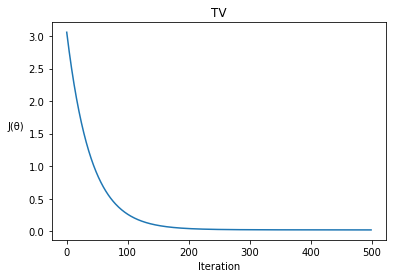

RMSE for train set:0.1434399917847283
RMSE for test set:0.15397376379418137


Result of theta: [0.36813219 0.26177665]


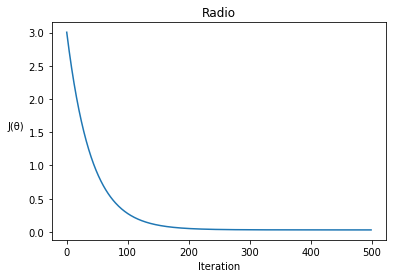

RMSE for train set:0.17239544326492134
RMSE for test set:0.16762310116008317


Result of theta: [ 0.49341984 -0.02775071]


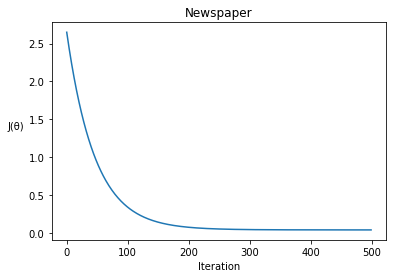

RMSE for train set:0.20498839781090725
RMSE for test set:0.22791031569633285


In [10]:
# Iterate over the three attributes, starting from column 1
for i in range(1, 4):
    # Select the corresponding column
    X = dataset[:, i]
    
    # split train and test data
    split = int(0.95 * X.shape[0])
    
    # h(Θ) = theta_0 * x0 + theta_1 * x1, and here x0 = 1
    # hence append 1 on each rwo
    train_data_X = np.column_stack((np.ones(len(X[:split])), X[:split]))
    train_data_y = Y[:split]
    test_data_X = np.column_stack((np.ones(len(X[split:])), X[split:]))
    test_data_y = Y[split:]
    
    # gradient descent
    theta = gradient_descent(train_data_X, train_data_y, theta_matrix)
    print("\n\nResult of theta: ", end = '')
    print(theta)
    
    # show plot, ylabel is the cost, xlabel is the corresponding tag
    plt.plot(cost_history)
    plt.title(tags[i])
    plt.xlabel("Iteration")
    plt.ylabel("J(θ)", rotation=0, labelpad=13)
    plt.show()
    
    # calculate RMSE for train
    predict_train_y = train_data_X.dot(theta)
    RMSE_train = RMSE_function(train_data_y, predict_train_y)
    print("RMSE for train set:" + str(RMSE_train))
    
    # test set
    predict_test_y = test_data_X.dot(theta)
    RMSE_test = RMSE_function(test_data_y, predict_test_y)
    print("RMSE for test set:" + str(RMSE_test))